### BZAN 6355 Advanced  Programming for  Big-Data Analytics
***


# Sales Prediction of 100 properties. 
AKSHAYA KANNAPIRAN , KEERTHANA YERRAGONDA

***
## Objective of the Project 
The main goal is for us to properly assemble, clean, and manage a set of raw data files about residential real estate properties; once you have the integrated and cleansed data set, use programming to build two (or more) types of supervised predictive algorithms (at least including linear regression and k-Nearest-Neighbor; you are encouraged but not required to self-acquire knowledge and skills of new models beyond the course's coverage) in order to estimate the sales price of a list of one-hundred (100) houses in a holdout sample. The data you will use are described below.

## The Data
given four (4) Raw data files containing information from an anonymous United States city assessor's office that is located in the North West region. The values in the data files are for individual residential real estate properties sold in that city over a time period of 4 years. Descriptions of the variables and the different data files are given below. These raw data files share one common column􏰏PID(Property ID), which is a string of 10 numbers denoting the unique IDs of the real estate property; you may want to use PID as a "primary key" as if in a  database, and join the several data files into an integrated data set (data-frame object).

## Variable Description  

1. PID (i.e., Property Identification) 
2. LotArea - The size of the lot, measured in square feet, on which the house is located.
3. LotShape - The general shape of the lot. A lot with a regular shape has a value of 1, and another with not a regular shape has a value of 0.
4. BldgTp (i.e., Building Type) 􏰫 This describes the type of home in terms of its footprint. A single-family detached type of home is indicated by a value of 1, and a townhouse type of home is indicated by a value of 0.
5. OverallQuality - This is a rating of the overall material and finish of the house. The numeric scale of this rating is as follows.
6. OverallCondition: This is a rating of the overall condition of the house. The numeric scale of this rating is as follows.
7. YearBuilt - This describes the year when the house was constructed.
8. YearRemodel .
9. VeneerExterior (i.e., Veneer Area of Exterior Wall) 􏰫 This describes the area in square feet of the exterior wall that is veneer.
10. BsmtFinTp (i.e., Basement Finished Type) - 
11. BsmtFinSqft (i.e., Basement Finished Sqr ft) - This is the measure of the area of a finished basement.
12. BsmtUnfinSqft (i.e., Basement Unfinished Sqr ft) - This is the measure of the area of an unfinished basement.
13. HeatingQC (i.e., Heating Quality Condition) - This is a measure of the rating of how well the heating unit is for a house. The rating scale is as follows.
14. FstFlrSqft (i.e., First floor Sqt ft) - This is a measure of the living space on the first floor of a house.
15. SecFlrSqft (i.e., Second floor Sqt ft) - This is a measure of the living space on the second floor of a house.
16. AbvGrndLiving (i.e., Above Ground Living Area) - This is a measure of the living space of the entire house, excluding the basement.
17. FullBathBsmt (i.e., Number Full Bath Basement) - This indicates the number of full bathrooms in the basement of a house. A value of 1 indicates that there is a full bathroom and a value of 0 indicates that there is not a full bathroom in the basement.
18. HalfBathHouse (i.e., Half Bath House) - This indicates whether there is a half bathroom in the house (excluding the basement). A value of 1 indicates that there is a half bathroom and a value of 0 indicates that there is not a half bathroom in the house.
19. FullBathHouse (i.e., Number Full Bath House) - This indicates the number of full bathrooms there are in the house, not including bathroom in the basement.
20. BdrmAbvGrnd (i.e., Number of Bedrooms Above Ground) - This indicates the number of bedrooms there are in the house, not including the basement.
21. RmAbvGrnd (i.e., Number of Rooms Above Ground) - This indicates the number of rooms there are in the house, not including the basement.
22. Fireplaces - This indicates the number of fireplaces there are in the house, not including the basement.
23. GarageTp (i.e., Garage Type) - Whether there is a garage of a given type is described and indicated as follows.
24. GarageCars - This indicates the number of cars that can be accommodated in the garage of the house.
25. GarageArea - This is the size of garage in square feet.
26. WdDckSqft (i.e., Wood Deck Sqr ft) - This is the size of the wood deck area in square feet for a house.
27. OpenPrchSqft (i.e., Open Porch Sqr ft) - This is the size of the open porch area in square feet for a house.
28. SalePrice - This is the sales price of a house

## Strategy of Data Analysis
The data analyses of this case illustrated below will follow this overarching strategy:
1. Importing the neccessary packages
1. Read the data set files / Data Management 
1. Exploratory Data Analysis
1. Preprocessing the train dataset
1. KNN Model - Standardizing all the interval variables
1. Transforming and Standradizing the y value
1. Import the Score Dataset
1. Performing z transformation in score data 
1. Modelling and Evaluation
1. Predictin
1. Exporting the csv file 

## Importing the neccessary packages 

In [8]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from numpy import NaN as NA 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn import linear_model
from matplotlib import pyplot as plt
import openpyxl as xls
import matplotlib.ticker as ticker
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [9]:
%matplotlib notebook

In [10]:
import statsmodels.api as sm
from sklearn import preprocessing
import sklearn.linear_model as lm
import sklearn.neighbors as knn

In [11]:
np.random.seed(1)

In [12]:
from sklearn.feature_selection import RFE

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

## Read the data files 

 The basic info one should check: 
- shape, columns and data types
- interval variables: summary statistics, describe
- nominal/binary variables: distributions of unique levels
- both interval and nominal variables: skewness of distributions and possible outliers
- missing values

In [14]:
#reading the dataset
property_survey_2 = pd.read_csv('Property_Survey_2.csv')
house_feature = pd.read_csv('House_Feature.csv')
property_survey_1 = pd.read_csv('Property_Survey_1.csv')
quality_assessment = pd.read_csv('Quality_Assessment.csv')

In [15]:
survey = property_survey_1.append(property_survey_2,ignore_index= True)

In [16]:
merge1 = house_feature.merge(survey, how='inner', on = 'PID')

In [17]:
final_merge = quality_assessment.merge(merge1,how='inner', on='PID')
final_merge.head()

,PID,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,...,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,LotArea,LotShape,BldgTp
0,526301100,6,5,1960,1960,112,1,639,441,0,...,2,3,2,528,210,62,215000,31770,0,1
1,526350040,5,6,1961,1961,0,1,468,270,1,...,0,3,1,730,140,0,105000,11622,1,1
2,526351010,6,6,1958,1958,108,1,923,406,1,...,0,3,1,312,393,36,172000,14267,0,1
3,526353030,7,5,1968,1968,0,1,1065,1045,3,...,2,3,2,522,0,0,244000,11160,1,1
4,527105010,5,5,1997,1998,0,1,791,137,2,...,1,3,2,482,212,34,189900,13830,0,1


In [18]:
final_merge.shape

(2370, 28)

In [19]:
#sanity check 
print('The dataset has {} missing values.'.format(final_merge.isnull().sum().sum()))

The dataset has 0 missing values.


In [20]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PID               2370 non-null   int64
 1   OverallQuality    2370 non-null   int64
 2   OverallCondition  2370 non-null   int64
 3   YearBuilt         2370 non-null   int64
 4   YearRemodel       2370 non-null   int64
 5   VeneerExterior    2370 non-null   int64
 6   BsmtFinTp         2370 non-null   int64
 7   BsmtFinSqft       2370 non-null   int64
 8   BsmtUnfinSqft     2370 non-null   int64
 9   HeatingQC         2370 non-null   int64
 10  FstFlrSqft        2370 non-null   int64
 11  SecFlrSqft        2370 non-null   int64
 12  AbvGrndLiving     2370 non-null   int64
 13  FullBathBsmt      2370 non-null   int64
 14  HalfBathHouse     2370 non-null   int64
 15  FullBathHouse     2370 non-null   int64
 16  BdrmAbvGrnd       2370 non-null   int64
 17  RmAbvGrnd         2370 non-null  

In [21]:
final_merge.describe().round(3)

,PID,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,...,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,LotArea,LotShape,BldgTp
count,2.370000e+03,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,...,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000
mean,7.153307e+08,6.051,5.630,1970.571,1984.087,88.144,0.705,429.806,557.102,2.154,...,0.589,2.233,1.719,457.979,91.651,46.003,173730.773,9700.865,0.643,0.877
std,1.886401e+08,1.252,1.096,30.109,20.694,158.719,0.456,408.780,410.685,0.944,...,0.630,1.010,0.709,197.609,120.617,64.246,64080.843,6153.730,0.479,0.328
min,5.263011e+08,2.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,12789.000,1300.000,0.000,0.000
25%,5.313690e+08,5.000,5.000,1953.000,1965.000,0.000,0.000,0.000,239.250,1.000,...,0.000,1.000,1.000,312.000,0.000,0.000,129900.000,7200.000,0.000,1.000
50%,5.354551e+08,6.000,5.000,1972.000,1993.000,0.000,1.000,378.000,470.000,3.000,...,1.000,3.000,2.000,463.000,0.000,25.000,159000.000,9316.000,1.000,1.000
75%,9.071351e+08,7.000,6.000,1999.000,2003.000,144.000,1.000,715.500,792.000,3.000,...,1.000,3.000,2.000,572.000,168.000,68.000,207000.000,11235.000,1.000,1.000
max,1.007100e+09,10.000,9.000,2010.000,2010.000,1600.000,1.000,2085.000,2140.000,3.000,...,4.000,3.000,5.000,1488.000,736.000,547.000,475000.000,159000.000,1.000,1.000


**Observe** from the above:
- descriptive stats include `mean`, `std` (standard deviation), `min` and `max`, `median` (50% percentile), and the 1st and 3rd quartiles (25% and 75% percentiles)
- `mean` of the **SalePrice** variables is about 173730.773 
- `mean` of the **BsmtUnfinSqft** variable is about 557.102 which is more than the `mean` of **BsmtFinSqft**
- `mean` of the **LotArea** variable is about 9700.865

#### Checking the correlation between the target and other input variables

In [22]:
final_merge.corr()['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQuality      0.780217
AbvGrndLiving       0.741919
GarageCars          0.669653
GarageArea          0.652042
FstFlrSqft          0.629534
FullBathHouse       0.590486
YearBuilt           0.585731
RmAbvGrnd           0.527042
YearRemodel         0.525906
Fireplaces          0.462909
GarageTp            0.459829
HeatingQC           0.438989
VeneerExterior      0.415283
BsmtFinSqft         0.384289
OpenPrchSqft        0.334222
HalfBathHouse       0.303561
WdDckSqft           0.293314
LotArea             0.290162
SecFlrSqft          0.284066
FullBathBsmt        0.247587
BdrmAbvGrnd         0.192239
BsmtUnfinSqft       0.158441
BsmtFinTp           0.116483
BldgTp              0.035231
OverallCondition   -0.136934
PID                -0.220939
LotShape           -0.322661
Name: SalePrice, dtype: float64

##### NOTE:
- `SalePrice` (target variable) has a correlation of 1 with itself 
- `OverallQuality` appears to be the best predictor of the target variable Sales Price
- `AbvGrndLiving`, `GarageArea`, `FstFlrSqft`, `FullBathHouse`, `RmAbvGrnd`, `Fireplaces`, `HeatingQC`, `VeneerExterior`, `BsmtFinSqft`, `GarageTp`, `OpenPrchSqft`,`Fireplaces`, `SecFlrSqft`, `WdDckSqft`, `LotArea`,`FullBathBsmt`, `BdrmAbvGrnd`, `GarageCars`, `HalfBathHouse` and `LotShape` have a medium correlation with sales price
- all other variables have a weak predictors of Sales Price

## Exploratory Data Analysis

## `GarageTp`

In [23]:
sGarageTp = final_merge['GarageTp'].value_counts().sort_index()
sGarageTp

0     105
1     682
2     139
3    1444
Name: GarageTp, dtype: int64

<IPython.core.display.Javascript object>


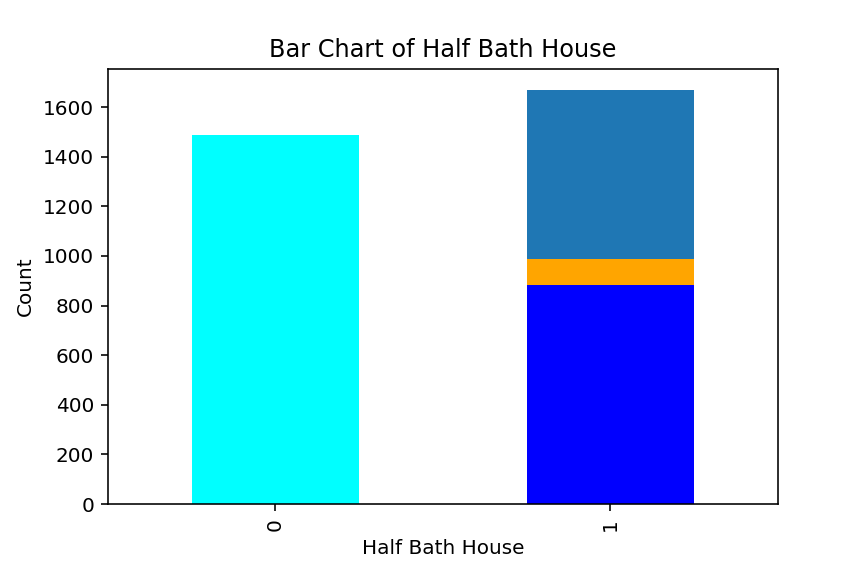

Text(0.5, 1.0, 'Bar Chart of Garage Type')

In [24]:
pltGarageTp = sGarageTp.plot.bar()
pltGarageTp.set_xlabel('Garage Type')
pltGarageTp.set_ylabel('Count')
pltGarageTp.set_title('Bar Chart of Garage Type')


## `BsmtFinTp`

In [25]:
sBsmtFinTp = final_merge['BsmtFinTp'].value_counts().sort_index()
sBsmtFinTp

0     700
1    1670
Name: BsmtFinTp, dtype: int64

In [26]:
pltBsmtFinTp = sBsmtFinTp.plot.bar()
pltBsmtFinTp.set_xlabel('Basement Finished Type')
pltBsmtFinTp.set_ylabel('Count')
pltBsmtFinTp.set_title('Bar Chart of Basement Finished Type')

Text(0.5, 1.0, 'Bar Chart of Basement Finished Type')

## `FullBathBsmt`

In [27]:
sFullBathBsmt = final_merge['FullBathBsmt'].value_counts().sort_index()
sFullBathBsmt

0    1384
1     986
Name: FullBathBsmt, dtype: int64

In [28]:
pltFullBathBsmt = sFullBathBsmt.plot.bar(color=['orange'])
pltFullBathBsmt.set_xlabel('Number Full Bath Basement')
pltFullBathBsmt.set_ylabel('Count')
pltFullBathBsmt.set_title('Bar Chart of Number Full Bath Basement')


Text(0.5, 1.0, 'Bar Chart of Number Full Bath Basement')

## `HalfBathHouse`

In [29]:
sHalfBathHouse = final_merge['HalfBathHouse'].value_counts().sort_index()
sHalfBathHouse

0    1488
1     882
Name: HalfBathHouse, dtype: int64

In [30]:
pltHalfBathHouse = sHalfBathHouse.plot.bar(color=['cyan', 'blue'])
pltHalfBathHouse.set_xlabel('Half Bath House')
pltHalfBathHouse.set_ylabel('Count')
pltHalfBathHouse.set_title('Bar Chart of Half Bath House')

Text(0.5, 1.0, 'Bar Chart of Half Bath House')

# Preprocessing the Train Dataset

According to the correlation, there are 20 variables in total selected excluding the target variable **SalePrice** 

- There is 1 target variable `"SalePrice"`, after preprocessing all input variables,we should standardization the target
- There are 4 binary variables we need to convert to flag variables :`LotShape`", "`BsmtFinTp`", "`FullBathBsmt`", "`HalfBathHouse`"
- The interval variables we should not do anything before standardization: "`VeneerExterior`", "`BsmtFinSqft`", "`BsmtUnfinSqft`", "`HeatingQC`", "`FstFlrSqft`", "`SecFlrSqft`", "`AbvGrndLiving`", "`FullBathHouse`", "`BdrmAbvGrnd`", "`RmAbvGrnd`", "`Fireplaces`", "`GarageTp`", "`GarageCars`", "`GarageArea`", "`WdDckSqft`", "`OpenPrchSqft`"




In [31]:
print(f'Total number of input variables to preprocess: {final_merge.drop(columns=["SalePrice", "YearBuilt", "YearRemodel", "BsmtUnfinSqft", "BsmtFinTp", "BldgTp","OverallCondition"]).shape[1]}')

Total number of input variables to preprocess: 21


### Converting the  binary variables into unweighted flag variables

### `LotShape`

In [32]:
flag_LotShape = pd.get_dummies(final_merge['LotShape'], prefix='LotShape').astype(np.float)
print('"flag_LotShape" has shape', flag_LotShape.shape)
flag_LotShape.head(3)

"flag_LotShape" has shape (2370, 2)


/var/folders/fm/tzb9hp3d2mdfxt8bwdg6j_y80000gn/T/ipykernel_19153/620191085.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flag_LotShape = pd.get_dummies(final_merge['LotShape'], prefix='LotShape').astype(np.float)


,LotShape_0,LotShape_1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0


### `BsmtFinTp`

In [33]:
flag_BsmtFinTp = pd.get_dummies(final_merge['BsmtFinTp'], prefix='BsmtFinTp').astype(np.float)
print('"flag_BsmtFinTp" has shape', flag_BsmtFinTp.shape)
flag_BsmtFinTp.head(3)

"flag_BsmtFinTp" has shape (2370, 2)


/var/folders/fm/tzb9hp3d2mdfxt8bwdg6j_y80000gn/T/ipykernel_19153/954886378.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flag_BsmtFinTp = pd.get_dummies(final_merge['BsmtFinTp'], prefix='BsmtFinTp').astype(np.float)


,BsmtFinTp_0,BsmtFinTp_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0


### `FullBathBsmt`

In [34]:
flag_FullBathBsmt = pd.get_dummies(final_merge['FullBathBsmt'], prefix='FullBathBsmt').astype(np.float)
print('"flag_FullBathBsmt" has shape', flag_FullBathBsmt.shape)
flag_FullBathBsmt.head(3)

"flag_FullBathBsmt" has shape (2370, 2)


/var/folders/fm/tzb9hp3d2mdfxt8bwdg6j_y80000gn/T/ipykernel_19153/2747671392.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flag_FullBathBsmt = pd.get_dummies(final_merge['FullBathBsmt'], prefix='FullBathBsmt').astype(np.float)


,FullBathBsmt_0,FullBathBsmt_1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0


### `HalfBathHouse`

In [35]:
flag_HalfBathHouse = pd.get_dummies(final_merge['HalfBathHouse'], prefix='HalfBathHouse').astype(np.float)
print('"flag_HalfBathHouse" has shape', flag_HalfBathHouse.shape)
flag_HalfBathHouse.head()

"flag_HalfBathHouse" has shape (2370, 2)


/var/folders/fm/tzb9hp3d2mdfxt8bwdg6j_y80000gn/T/ipykernel_19153/1516303056.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flag_HalfBathHouse = pd.get_dummies(final_merge['HalfBathHouse'], prefix='HalfBathHouse').astype(np.float)


,HalfBathHouse_0,HalfBathHouse_1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [36]:
#checking if all the binary and nominal variables are there - 4
dfDummy = pd.get_dummies(final_merge, columns=['LotShape','BsmtFinTp','FullBathBsmt','HalfBathHouse'], prefix = ['LotShape','BsmtFinTp','FullBathBsmt','HalfBathHouse'], drop_first=True) 
dfDummy.head(3)

,PID,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,...,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,LotArea,BldgTp,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
0,526301100,6,5,1960,1960,112,639,441,0,1656,...,528,210,62,215000,31770,1,0,1,1,0
1,526350040,5,6,1961,1961,0,468,270,1,896,...,730,140,0,105000,11622,1,1,1,0,0
2,526351010,6,6,1958,1958,108,923,406,1,1329,...,312,393,36,172000,14267,1,0,1,0,1


In [37]:
#Dataframe for PID only and binary only
PID_column_only = pd.DataFrame(dfDummy['PID'])
binary_column_only = pd.DataFrame(dfDummy[['PID','LotShape_1', 'BsmtFinTp_1', 'FullBathBsmt_1', 'HalfBathHouse_1']])
PID_column_only.head(2), binary_column_only.head(2)

(         PID
 0  526301100
 1  526350040,
          PID  LotShape_1  BsmtFinTp_1  FullBathBsmt_1  HalfBathHouse_1
 0  526301100           0            1               1                0
 1  526350040           1            1               0                0)

#### KNN Model - Standardizing all the interval variables

In [38]:
# The following 13 columns are interval (or equivalent to interval) variables for which "median" imputation makes sense
interval_columns = ['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving', 'FullBathHouse', 
                      'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft']

In [39]:
dfinterval_columns = dfDummy[interval_columns].copy()

In [40]:
df_interval = pd.DataFrame(dfinterval_columns, columns =interval_columns , index = dfinterval_columns.index)
display(df_interval.shape, df_interval.dtypes, df_interval.isnull().sum().sum())

(2370, 16)

VeneerExterior    int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
dtype: object

0

In [41]:
# sanity check
print('After imputation, these variables have {} missing values.'.format(df_interval.isnull().sum().sum()))

After imputation, these variables have 0 missing values.


In [42]:
z_scaler = preprocessing.StandardScaler()
z = z_scaler.fit_transform(df_interval)
df_Z_Transformed = pd.DataFrame(z, columns=df_interval.columns, index=df_interval.index)
df_Z_Transformed = df_Z_Transformed.add_suffix('_z')
df_Z_Transformed.head()

,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,RmAbvGrnd_z,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z
0,0.150336,0.511861,-0.282762,-2.281286,1.567525,-0.800760,0.470986,-1.012751,0.247145,0.532453,2.237915,0.759526,0.396435,0.354417,0.981410,0.249057
1,-0.555464,0.093454,-0.699227,-1.221990,-0.640431,-0.800760,-1.234949,-1.012751,-1.099367,-0.903987,-0.935198,0.759526,-1.014303,1.376856,0.400936,-0.716193
2,0.125129,1.206758,-0.368003,-1.221990,0.617523,-0.800760,-0.263015,-1.012751,0.247145,-0.185767,-0.935198,0.759526,-1.014303,-0.738884,2.498934,-0.155725
3,-0.555464,1.554206,1.188261,0.896603,2.886488,-0.800760,1.490057,0.980787,0.247145,1.250673,2.237915,0.759526,0.396435,0.324048,-0.760011,-0.716193
4,-0.555464,0.883777,-1.023144,-0.162694,-0.547464,0.925362,0.410380,0.980787,0.247145,-0.185767,0.651359,0.759526,0.396435,0.121585,0.997995,-0.186862


In [43]:
#creating copy
df_Z_Transformed_copy = df_Z_Transformed.copy()
df_Z_Transformed_copy.insert(0,"PID", PID_column_only)

In [44]:
df_Z_Transformed_LinearCopy = df_Z_Transformed_copy.merge(binary_column_only, on = "PID", how = "inner")

In [45]:
df_Z_Transformed_LinearCopy.head(3)

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
0,526301100,0.150336,0.511861,-0.282762,-2.281286,1.567525,-0.80076,0.470986,-1.012751,0.247145,...,2.237915,0.759526,0.396435,0.354417,0.981410,0.249057,0,1,1,0
1,526350040,-0.555464,0.093454,-0.699227,-1.221990,-0.640431,-0.80076,-1.234949,-1.012751,-1.099367,...,-0.935198,0.759526,-1.014303,1.376856,0.400936,-0.716193,1,1,0,0
2,526351010,0.125129,1.206758,-0.368003,-1.221990,0.617523,-0.80076,-0.263015,-1.012751,0.247145,...,-0.935198,0.759526,-1.014303,-0.738884,2.498934,-0.155725,0,1,0,1


In [46]:
# X_final for linear regression only
x_final = df_Z_Transformed_LinearCopy
x_final.shape, x_final.isnull().sum().sum()

((2370, 21), 0)

In [47]:
SalePrice = pd.DataFrame(final_merge['SalePrice'])
SalePrice

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900
...,...
2365,131000
2366,142500
2367,131000
2368,132000


### Traansforming and Standradizing the y value


In [48]:
yScaler = preprocessing.StandardScaler()
y_final = pd.DataFrame(yScaler.fit_transform(SalePrice), columns=['SalePrice'])
y_final.head()

,SalePrice
0,0.644154
1,-1.072790
2,-0.027015
3,1.096803
4,0.252379


In [49]:
df_Z_trans_Knn1 = pd.DataFrame(df_Z_Transformed_LinearCopy['LotShape_1'].replace(to_replace={1: 0.707})) 
df_Z_trans_Knn2 = pd.DataFrame(df_Z_Transformed_LinearCopy['BsmtFinTp_1'].replace(to_replace={1: 0.707}))
df_Z_trans_Knn3 = pd.DataFrame(df_Z_Transformed_LinearCopy['FullBathBsmt_1'].replace(to_replace={1: 0.707}))
df_Z_trans_Knn4 = pd.DataFrame(df_Z_Transformed_LinearCopy['HalfBathHouse_1'].replace(to_replace={1: 0.707}))

In [50]:
new_trans = pd.DataFrame(df_Z_trans_Knn1)
new_trans.insert(1,"BsmtFinTp_1",df_Z_trans_Knn2)
new_trans.insert(2,"FullBathBsmt_1",df_Z_trans_Knn3)
new_trans.insert(3,"HalfBathHouse_1",df_Z_trans_Knn4)
new_trans.insert(0,"PID", PID_column_only)

In [51]:
df_ztransknncopy = df_Z_Transformed_copy.merge(new_trans, on='PID', how='inner')
df_ztransknncopy

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
0,526301100,0.150336,0.511861,-0.282762,-2.281286,1.567525,-0.800760,0.470986,-1.012751,0.247145,...,2.237915,0.759526,0.396435,0.354417,0.981410,0.249057,0.000,0.707,0.707,0.000
1,526350040,-0.555464,0.093454,-0.699227,-1.221990,-0.640431,-0.800760,-1.234949,-1.012751,-1.099367,...,-0.935198,0.759526,-1.014303,1.376856,0.400936,-0.716193,0.707,0.707,0.000,0.000
2,526351010,0.125129,1.206758,-0.368003,-1.221990,0.617523,-0.800760,-0.263015,-1.012751,0.247145,...,-0.935198,0.759526,-1.014303,-0.738884,2.498934,-0.155725,0.000,0.707,0.000,0.707
3,526353030,-0.555464,1.554206,1.188261,0.896603,2.886488,-0.800760,1.490057,0.980787,0.247145,...,2.237915,0.759526,0.396435,0.324048,-0.760011,-0.716193,0.707,0.707,0.707,0.707
4,527105010,-0.555464,0.883777,-1.023144,-0.162694,-0.547464,0.925362,0.410380,0.980787,0.247145,...,0.651359,0.759526,0.396435,0.121585,0.997995,-0.186862,0.000,0.707,0.000,0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,923251180,-0.555464,1.943251,-1.356803,0.896603,0.312476,-0.800760,-0.498704,-1.012751,1.593656,...,0.651359,-1.220756,0.396435,0.597373,3.170624,-0.716193,0.707,0.707,0.707,0.000
2366,923275080,-0.555464,0.952288,-0.908677,-1.221990,-0.329574,-0.800760,-0.994772,-1.012751,0.247145,...,-0.935198,-1.220756,0.396435,0.658112,0.235087,-0.716193,0.000,0.707,0.707,0.000
2367,923276100,-0.555464,-0.315165,-0.774726,-1.221990,-0.623000,-0.800760,-1.221481,-1.012751,-1.099367,...,-0.935198,0.759526,0.396435,0.131708,0.599956,-0.716193,0.000,0.707,0.707,0.000
2368,923400125,-0.555464,-0.227079,0.043591,-1.221990,-0.425446,-0.800760,-1.068845,-1.012751,0.247145,...,-0.935198,-2.210897,-2.425041,-2.318096,-0.096613,-0.217999,0.707,0.707,0.000,0.000


In [52]:
# X_finalKNN for kNN only w/ PID
X_finalknn = df_ztransknncopy
X_finalknn.shape, X_finalknn.isnull().sum().sum()

((2370, 21), 0)

## Import the Score Dataset

In [53]:
df_Score = pd.read_csv('Score_Data-No_Sale_Price.csv')

In [54]:
df_Score.shape

(100, 27)

In [55]:
df_Score.describe()

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,97.000000,100.000000,...,100.000000,100.000000,95.000000,96.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,6.576229e+08,9322.570000,0.460000,0.910000,6.520000,5.350000,1990.730000,1993.37000,137.659794,0.670000,...,0.530000,2.520000,2.789474,6.500000,0.540000,2.61000,2.010000,532.280000,108.53000,48.370000
std,1.808138e+08,2775.829625,0.500908,0.287623,1.029661,0.715979,18.079429,15.26444,194.065490,0.472582,...,0.501614,3.608296,0.523790,1.222594,0.610017,0.75069,0.437971,140.276788,123.17471,45.848599
min,5.271631e+08,1680.000000,0.000000,0.000000,4.000000,4.000000,1921.000000,1950.00000,0.000000,0.000000,...,0.000000,1.000000,2.000000,4.000000,0.000000,1.00000,1.000000,186.000000,0.00000,0.000000
25%,5.274515e+08,8126.500000,0.000000,1.000000,6.000000,5.000000,1974.750000,1977.00000,0.000000,0.000000,...,0.000000,2.000000,2.000000,6.000000,0.000000,3.00000,2.000000,440.000000,0.00000,0.000000
50%,5.284571e+08,9008.500000,0.000000,1.000000,7.000000,5.000000,1999.000000,2000.00000,72.000000,1.000000,...,1.000000,2.000000,3.000000,6.000000,0.000000,3.00000,2.000000,528.500000,100.00000,43.500000
75%,9.071821e+08,10461.000000,1.000000,1.000000,7.000000,5.250000,2003.250000,2004.00000,202.000000,1.000000,...,1.000000,2.000000,3.000000,7.000000,1.000000,3.00000,2.000000,614.250000,192.00000,73.250000
max,9.144764e+08,16900.000000,1.000000,1.000000,9.000000,8.000000,2010.000000,2010.00000,1110.000000,1.000000,...,1.000000,20.000000,4.000000,10.000000,2.000000,3.00000,3.000000,908.000000,576.00000,224.000000


In [56]:
df_Score.isnull().sum()

PID                 0
LotArea             0
LotShape            0
BldgTp              0
OverallQuality      0
OverallCondition    0
YearBuilt           0
YearRemodel         0
VeneerExterior      3
BsmtFinTp           0
BsmtFinSqft         0
BsmtUnfinSqft       0
HeatingQC           0
FstFlrSqft          4
SecFlrSqft          4
AbvGrndLiving       0
FullBathBsmt        0
HalfBathHouse       0
FullBathHouse       0
BdrmAbvGrnd         5
RmAbvGrnd           4
Fireplaces          0
GarageTp            0
GarageCars          0
GarageArea          0
WdDckSqft           0
OpenPrchSqft        0
dtype: int64

In [57]:
df_Score.head()

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
0,528445060,8987,1,1,8,5,2005,2006,226.0,0,...,0,2,2.0,6.0,1,3,3,880,144,0
1,528456160,9215,1,1,7,5,2009,2010,0.0,0,...,0,2,2.0,4.0,0,3,2,676,0,136
2,528458070,8640,1,1,7,5,2009,2009,0.0,1,...,1,2,3.0,7.0,0,3,2,614,169,45
3,906380190,6762,1,1,7,5,2006,2006,24.0,1,...,0,2,2.0,6.0,0,3,2,632,105,61
4,906385010,10402,0,1,7,5,2009,2009,0.0,0,...,0,2,3.0,6.0,0,3,3,740,0,36


In [58]:
df_Score.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

In [59]:
binary_column_only_score = pd.DataFrame(df_Score, columns=['LotShape','BsmtFinTp','FullBathBsmt','HalfBathHouse'])

In [60]:
PID_column_score = pd.DataFrame(df_Score['PID'])
binary_column_only_score.insert(0,'PID', PID_column_score)

In [61]:
df_interval_scorecolumns = df_Score[interval_columns].copy()
df_interval_scorecolumns

,VeneerExterior,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,AbvGrndLiving,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
0,226.0,0,1595,3,1595.0,0.0,1595,2,2.0,6.0,1,3,3,880,144,0
1,0.0,0,1218,3,1218.0,0.0,1218,2,2.0,4.0,0,3,2,676,0,136
2,0.0,24,732,3,764.0,783.0,1547,2,3.0,7.0,0,3,2,614,169,45
3,24.0,686,501,3,1208.0,0.0,1208,2,2.0,6.0,0,3,2,632,105,61
4,0.0,0,1226,3,1226.0,0.0,1226,2,3.0,6.0,0,3,3,740,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,365.0,0,1704,3,1722.0,1036.0,2758,2,4.0,9.0,1,2,3,814,282,55
96,664.0,1016,556,3,1572.0,1096.0,2668,2,NaN,10.0,2,2,3,726,400,0
97,292.0,866,132,3,1006.0,1040.0,2046,2,3.0,8.0,1,2,3,871,320,62
98,504.0,1149,454,3,1575.0,NaN,1575,2,2.0,NaN,1,3,3,732,216,28


### performing z transformation in score data 

In [62]:
z_score = z_scaler.fit_transform(df_interval_scorecolumns)
df_ztrans_score = pd.DataFrame(z_score, columns=df_interval_scorecolumns.columns, index=df_interval_scorecolumns.index)
df_ztrans_score = df_ztrans_score.add_suffix('_z')
df_ztrans_score.head()

,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,RmAbvGrnd_z,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z
0,0.457573,-1.068477,2.277984,0.586588,1.500716,-0.863939,0.173038,-0.144838,-1.515229,-0.411113,0.757876,0.522139,2.271814,2.491301,0.289416,-1.060309
1,-0.713032,-1.068477,1.371704,0.586588,0.322029,-0.863939,-0.799028,-0.144838,-1.515229,-2.055566,-0.889680,0.522139,-0.022948,1.029707,-0.885545,1.920919
2,-0.713032,-1.004822,0.203396,0.586588,-1.097399,0.433471,0.049274,-0.144838,0.404061,0.411113,-0.889680,0.522139,-0.022948,0.585497,0.493402,-0.073873
3,-0.588720,0.750997,-0.351911,0.586588,0.290764,-0.863939,-0.824812,-0.144838,-1.515229,-0.411113,-0.889680,0.522139,-0.022948,0.714462,-0.028803,0.276860
4,-0.713032,-1.068477,1.390935,0.586588,0.347041,-0.863939,-0.778401,-0.144838,0.404061,-0.411113,-0.889680,0.522139,2.271814,1.488247,-0.885545,-0.271160


In [63]:
df_ztrans_score.insert(0,'PID', PID_column_score)

In [64]:
dfZTransformedScoreLinearCopy =df_ztrans_score.merge(binary_column_only_score, on='PID', how='inner')
dfZTransformedScoreLinearCopy

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape,BsmtFinTp,FullBathBsmt,HalfBathHouse
0,528445060,0.457573,-1.068477,2.277984,0.586588,1.500716,-0.863939,0.173038,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,2.491301,0.289416,-1.060309,1,0,0,0
1,528456160,-0.713032,-1.068477,1.371704,0.586588,0.322029,-0.863939,-0.799028,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,1.029707,-0.885545,1.920919,1,0,0,0
2,528458070,-0.713032,-1.004822,0.203396,0.586588,-1.097399,0.433471,0.049274,-0.144838,0.404061,...,-0.889680,0.522139,-0.022948,0.585497,0.493402,-0.073873,1,1,0,1
3,906380190,-0.588720,0.750997,-0.351911,0.586588,0.290764,-0.863939,-0.824812,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,0.714462,-0.028803,0.276860,1,1,1,0
4,906385010,-0.713032,-1.068477,1.390935,0.586588,0.347041,-0.863939,-0.778401,-0.144838,0.404061,...,-0.889680,0.522139,2.271814,1.488247,-0.885545,-0.271160,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,528118040,1.177547,-1.068477,2.540012,0.586588,1.897781,0.852685,3.171746,-0.144838,2.323351,...,0.757876,-0.816680,2.271814,2.018433,1.415420,0.145335,0,0,0,1
96,528166120,2.726268,1.626255,-0.219695,0.586588,1.428807,0.952104,2.939688,-0.144838,NaN,...,2.405432,-0.816680,2.271814,1.387941,2.378235,-1.060309,0,1,1,1
97,528170070,0.799431,1.228411,-1.238959,0.586588,-0.340788,0.859313,1.335908,-0.144838,0.404061,...,0.757876,-0.816680,2.271814,2.426819,1.725479,0.298780,1,1,1,1
98,528172080,1.897521,1.979010,-0.464895,0.586588,1.438186,NaN,0.121470,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,1.430929,0.876896,-0.446527,0,1,1,0


#### Creating knn 

In [65]:
df_ztrans_scoreKnn1 = pd.DataFrame(dfZTransformedScoreLinearCopy['LotShape'].replace(to_replace={1: 0.707}))  
df_ztrans_scoreKnn2 = pd.DataFrame(dfZTransformedScoreLinearCopy['BsmtFinTp'].replace(to_replace={1: 0.707})) 
df_ztrans_scoreKnn3 = pd.DataFrame(dfZTransformedScoreLinearCopy['FullBathBsmt'].replace(to_replace={1: 0.707})) 
df_ztrans_scoreKnn4 = pd.DataFrame(dfZTransformedScoreLinearCopy['HalfBathHouse'].replace(to_replace={1: 0.707})) 

In [66]:
new_score_df = pd.DataFrame(df_ztrans_scoreKnn1) 
new_score_df.insert(1,"BsmtFinTp",df_ztrans_scoreKnn2) 
new_score_df.insert(2,"FullBathBsmt",df_ztrans_scoreKnn3) 
new_score_df.insert(3,"HalfBathHouse",df_ztrans_scoreKnn4) 
new_score_df.insert(0,"PID", PID_column_score)

In [67]:
dfZTransformedScoreKNNCopy = df_ztrans_score.merge(new_score_df, on='PID', how='inner') 
dfZTransformedScoreKNNCopy 

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape,BsmtFinTp,FullBathBsmt,HalfBathHouse
0,528445060,0.457573,-1.068477,2.277984,0.586588,1.500716,-0.863939,0.173038,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,2.491301,0.289416,-1.060309,0.707,0.000,0.000,0.000
1,528456160,-0.713032,-1.068477,1.371704,0.586588,0.322029,-0.863939,-0.799028,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,1.029707,-0.885545,1.920919,0.707,0.000,0.000,0.000
2,528458070,-0.713032,-1.004822,0.203396,0.586588,-1.097399,0.433471,0.049274,-0.144838,0.404061,...,-0.889680,0.522139,-0.022948,0.585497,0.493402,-0.073873,0.707,0.707,0.000,0.707
3,906380190,-0.588720,0.750997,-0.351911,0.586588,0.290764,-0.863939,-0.824812,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,0.714462,-0.028803,0.276860,0.707,0.707,0.707,0.000
4,906385010,-0.713032,-1.068477,1.390935,0.586588,0.347041,-0.863939,-0.778401,-0.144838,0.404061,...,-0.889680,0.522139,2.271814,1.488247,-0.885545,-0.271160,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,528118040,1.177547,-1.068477,2.540012,0.586588,1.897781,0.852685,3.171746,-0.144838,2.323351,...,0.757876,-0.816680,2.271814,2.018433,1.415420,0.145335,0.000,0.000,0.000,0.707
96,528166120,2.726268,1.626255,-0.219695,0.586588,1.428807,0.952104,2.939688,-0.144838,NaN,...,2.405432,-0.816680,2.271814,1.387941,2.378235,-1.060309,0.000,0.707,0.707,0.707
97,528170070,0.799431,1.228411,-1.238959,0.586588,-0.340788,0.859313,1.335908,-0.144838,0.404061,...,0.757876,-0.816680,2.271814,2.426819,1.725479,0.298780,0.707,0.707,0.707,0.707
98,528172080,1.897521,1.979010,-0.464895,0.586588,1.438186,NaN,0.121470,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,1.430929,0.876896,-0.446527,0.000,0.707,0.707,0.000


## Modelling and Evaluation

### Linear regression mode

In [68]:
regRFE = lm.LinearRegression()

##### RFE containing 15 most siginificant input

In [69]:
rfe_15 = RFE(regRFE, n_features_to_select=15)

#### third, fit this rfe

In [70]:
rfe_15.fit(X=x_final, y=y_final['SalePrice'])

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [71]:
# get the names of the retained columns
display(x_final.columns[rfe_15.get_support()].shape[0],
        x_final.columns[rfe_15.get_support()])

15

Index(['VeneerExterior_z', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'HeatingQC_z',
       'FstFlrSqft_z', 'SecFlrSqft_z', 'AbvGrndLiving_z', 'FullBathHouse_z',
       'BdrmAbvGrnd_z', 'Fireplaces_z', 'GarageCars_z', 'GarageArea_z',
       'LotShape_1', 'FullBathBsmt_1', 'HalfBathHouse_1'],
      dtype='object')

 The above 15 columns are the retained inputs.

Instead of manually change `n_features_to_select` argument and rerun RFEs, use a `for-loop`:

In [72]:
# fit 19 times each with a different n_features_to_select value -- result stored in 19 columns
df_retained_bool = pd.DataFrame()
for i in range(1, 21, 1):
    rfe_temp = RFE(regRFE, n_features_to_select = i)
    rfe_temp.fit(X = x_final, y = y_final['SalePrice'])
    df_retained_bool['retained_' + str(i)] = rfe_temp.get_support()

display(df_retained_bool.shape, df_retained_bool.sum())

(21, 20)

retained_1      1
retained_2      2
retained_3      3
retained_4      4
retained_5      5
retained_6      6
retained_7      7
retained_8      8
retained_9      9
retained_10    10
retained_11    11
retained_12    12
retained_13    13
retained_14    14
retained_15    15
retained_16    16
retained_17    17
retained_18    18
retained_19    19
retained_20    20
dtype: int64

In [73]:
# using the 19 iterations of selected features, calculate their x-valid scores for each
regression = lm.LinearRegression()
df_xvalid_reg = pd.DataFrame()
for label, content in df_retained_bool.iteritems():
    selected_labels_list = x_final.columns[content.to_numpy()]
    df_xvalid_reg[label] = cross_val_score(regression, X = x_final[selected_labels_list], y = y_final['SalePrice'], cv = 10, 
                                           scoring = 'neg_mean_squared_error')

df_xvalid_reg.shape

(10, 20)

In [74]:
xvalid_mean_reg = df_xvalid_reg.mean()
xvalid_mean_reg

retained_1    -0.615948
retained_2    -0.357091
retained_3    -0.275768
retained_4    -0.248416
retained_5    -0.219171
retained_6    -0.214117
retained_7    -0.212392
retained_8    -0.205647
retained_9    -0.202563
retained_10   -0.200756
retained_11   -0.194033
retained_12   -0.194572
retained_13   -0.192530
retained_14   -0.189391
retained_15   -0.187300
retained_16   -0.186889
retained_17   -0.185580
retained_18   -0.184089
retained_19   -0.183826
retained_20   -0.184018
dtype: float64

>_All trained regression model results ready!_

## KNN Algorithm 

In [75]:
df_xvalid_knnlwa = pd.DataFrame()
for i in range(4, 100):
    # define a kNN instance
    knnlwa_temp = knn.KNeighborsRegressor(n_neighbors=i, weights='distance')
    df_xvalid_knnlwa['k_' + str(i)] = cross_val_score(knnlwa_temp, X = X_finalknn, y = y_final['SalePrice'], cv = 10, 
                                                      scoring = 'neg_mean_squared_error')

df_xvalid_knnlwa.shape

(10, 96)

In [76]:
n_neighbors = np.floor(df_ztransknncopy.shape[0] / 500).astype(int)
n_neighbors

4

In [77]:
xvalid_mean_knnlwa = df_xvalid_knnlwa.mean()
xvalid_mean_knnlwa

k_4    -0.349840
k_5    -0.345350
k_6    -0.341425
k_7    -0.339211
k_8    -0.338371
          ...   
k_95   -0.325608
k_96   -0.325632
k_97   -0.325646
k_98   -0.325653
k_99   -0.325640
Length: 96, dtype: float64

## Evaluating linear regression

<IPython.core.display.Javascript object>


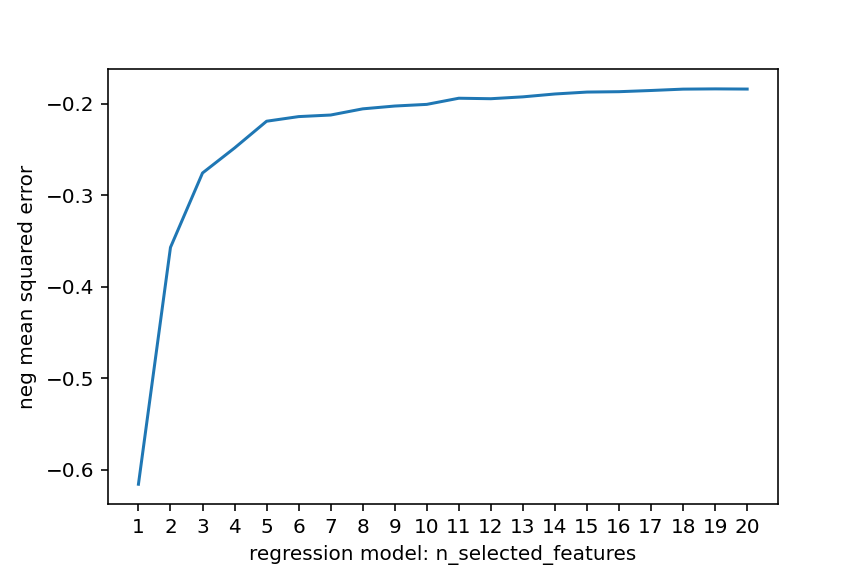

In [78]:
newfig = plt.figure(figsize=(6,4))
s_numbering = pd.Series(xvalid_mean_reg.index).apply(lambda x:x[9:]).astype(int)
xvalid_mean_reg_copy = xvalid_mean_reg.copy()
xvalid_mean_reg_copy.index = s_numbering
figXvalReg = xvalid_mean_reg_copy.plot.line()

In [79]:
figXvalReg.set_xlabel('regression model: n_selected_features')
figXvalReg.set_ylabel('neg mean squared error')
figXvalReg.set_xticks(s_numbering)

Regression model with **19** selected features has the highest x-valid score (i.e., largest mean "neg_mean_squared_error").<br><br>**Conclusion: model "retained_19" is the best x-valid performance model of regression models**<br><br>To be precise, sort the results:

In [80]:
xvalid_mean_reg.sort_values(ascending=False)

retained_19   -0.183826
retained_20   -0.184018
retained_18   -0.184089
retained_17   -0.185580
retained_16   -0.186889
retained_15   -0.187300
retained_14   -0.189391
retained_13   -0.192530
retained_11   -0.194033
retained_12   -0.194572
retained_10   -0.200756
retained_9    -0.202563
retained_8    -0.205647
retained_7    -0.212392
retained_6    -0.214117
retained_5    -0.219171
retained_4    -0.248416
retained_3    -0.275768
retained_2    -0.357091
retained_1    -0.615948
dtype: float64

### Evaluating kNN(LWA) models
Visualize the stored mean x-valid scores of kNN(LWA) model results:

<IPython.core.display.Javascript object>


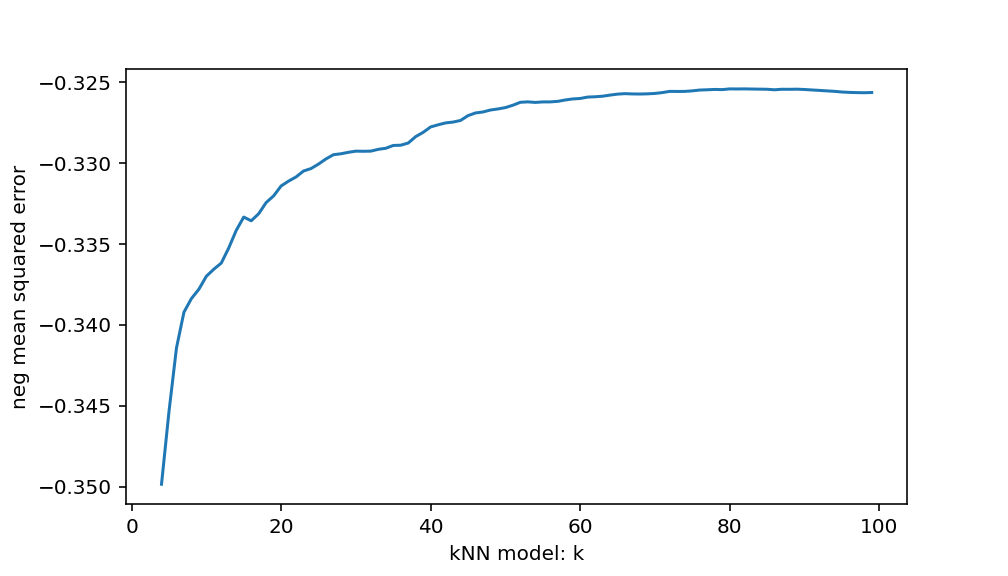

/var/folders/fm/tzb9hp3d2mdfxt8bwdg6j_y80000gn/T/ipykernel_19153/436430490.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_numbering = pd.Series(xvalid_mean_knnlwa.index).apply(lambda x:x[2:]).astype(np.int)


In [81]:
newfig = plt.figure(figsize=(7,4))
s_numbering = pd.Series(xvalid_mean_knnlwa.index).apply(lambda x:x[2:]).astype(np.int)
xvalid_mean_knnlwa_copy = xvalid_mean_knnlwa.copy()
xvalid_mean_knnlwa_copy.index = s_numbering
figXvalKnn = xvalid_mean_knnlwa_copy.plot.line()

In [82]:
figXvalKnn.set_xlabel('kNN model: k')
figXvalKnn.set_ylabel('neg mean squared error')


Text(0, 0.5, 'neg mean squared error')

kNN(LWA) model with **k = 82** has the highest x-valid score (i.e., largest mean "neg_mean_squared_error").<br><br>**Conclusion: model "k_82" is the best x-valid performance model of kNN (LWA) models**<br><br>To be precise, sort the results:

In [83]:
xvalid_mean_knnlwa.sort_values(ascending=False)

k_82   -0.325416
k_80   -0.325416
k_81   -0.325420
k_83   -0.325424
k_84   -0.325432
          ...   
k_8    -0.338371
k_7    -0.339211
k_6    -0.341425
k_5    -0.345350
k_4    -0.349840
Length: 96, dtype: float64

### Select the best-of-the-best model

In [84]:
# Best regression model's features boolean series: best model has n_selected_features = 19
best_features_bool = df_retained_bool[df_retained_bool.columns[df_retained_bool.columns == 'retained_19']]
best_features_bool = np.squeeze(best_features_bool)
best_features_bool.sum()

19

double-check the x-valid performance of this model, making sure indexed features boolean series is correct

In [85]:
xvalid_best_reg = cross_val_score(regression, X=x_final[x_final.columns[best_features_bool]], y=y_final['SalePrice'], cv=10, 
                                  scoring='neg_mean_squared_error')
xvalid_best_reg.mean()

-0.18382560621262306

Best kNN(LWA) model's specification is simple: k = 82

In [86]:
knnlwa = knn.KNeighborsRegressor(n_neighbors=82, weights='distance')
xvalid_best_knnlwa = cross_val_score(knnlwa, X=X_finalknn, y=y_final['SalePrice'], cv=10, scoring='neg_mean_squared_error')
xvalid_best_knnlwa.mean()

-0.3254158786045827

In [87]:
print('Is the best x-valid regression model better than the best x-valid kNN (LWA) model?', 
      xvalid_best_reg.mean() > xvalid_best_knnlwa.mean())

Is the best x-valid regression model better than the best x-valid kNN (LWA) model? True


In [88]:
print(x_final.columns.values[best_features_bool])

['VeneerExterior_z' 'BsmtFinSqft_z' 'BsmtUnfinSqft_z' 'HeatingQC_z'
 'FstFlrSqft_z' 'SecFlrSqft_z' 'AbvGrndLiving_z' 'FullBathHouse_z'
 'BdrmAbvGrnd_z' 'RmAbvGrnd_z' 'Fireplaces_z' 'GarageTp_z' 'GarageCars_z'
 'GarageArea_z' 'WdDckSqft_z' 'OpenPrchSqft_z' 'LotShape_1'
 'FullBathBsmt_1' 'HalfBathHouse_1']


## Predicting 

In [89]:
X_scoreReg_final = dfZTransformedScoreLinearCopy
X_scoreKNN_final = dfZTransformedScoreKNNCopy

In [90]:
imputer_median = SimpleImputer(strategy = 'median')
impute_intervalColumns = ['VeneerExterior_z', 'FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z']
df_impute_intervalColumns = dfZTransformedScoreKNNCopy[impute_intervalColumns].copy()
df_imputed_intervals = pd.DataFrame(imputer_median.fit_transform(df_impute_intervalColumns),columns = impute_intervalColumns, index = df_impute_intervalColumns.index)
df_imputed_intervals.insert(0,'PID',PID_column_score)
df_imputed_intervals

,PID,VeneerExterior_z,FstFlrSqft_z,SecFlrSqft_z,BdrmAbvGrnd_z,RmAbvGrnd_z
0,528445060,0.457573,1.500716,-0.863939,-1.515229,-0.411113
1,528456160,-0.713032,0.322029,-0.863939,-1.515229,-2.055566
2,528458070,-0.713032,-1.097399,0.433471,0.404061,0.411113
3,906380190,-0.588720,0.290764,-0.863939,-1.515229,-0.411113
4,906385010,-0.713032,0.347041,-0.863939,0.404061,-0.411113
...,...,...,...,...,...,...
95,528118040,1.177547,1.897781,0.852685,2.323351,2.055566
96,528166120,2.726268,1.428807,0.952104,0.404061,2.877793
97,528170070,0.799431,-0.340788,0.859313,0.404061,1.233340
98,528172080,1.897521,1.438186,0.066452,-1.515229,-0.411113


In [91]:
imputer_by_median = SimpleImputer(strategy = 'median')
impute_interval_reg = ['VeneerExterior_z', 'FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z']
df_impute_intervalreg = dfZTransformedScoreLinearCopy[impute_interval_reg].copy()
df_imputed_intervalsreg = pd.DataFrame(imputer_by_median.fit_transform(df_impute_intervalreg),columns = impute_interval_reg, index = df_impute_intervalreg.index)
df_imputed_intervalsreg.insert(0,'PID',PID_column_score)
df_imputed_intervalsreg

,PID,VeneerExterior_z,FstFlrSqft_z,SecFlrSqft_z,BdrmAbvGrnd_z,RmAbvGrnd_z
0,528445060,0.457573,1.500716,-0.863939,-1.515229,-0.411113
1,528456160,-0.713032,0.322029,-0.863939,-1.515229,-2.055566
2,528458070,-0.713032,-1.097399,0.433471,0.404061,0.411113
3,906380190,-0.588720,0.290764,-0.863939,-1.515229,-0.411113
4,906385010,-0.713032,0.347041,-0.863939,0.404061,-0.411113
...,...,...,...,...,...,...
95,528118040,1.177547,1.897781,0.852685,2.323351,2.055566
96,528166120,2.726268,1.428807,0.952104,0.404061,2.877793
97,528170070,0.799431,-0.340788,0.859313,0.404061,1.233340
98,528172080,1.897521,1.438186,0.066452,-1.515229,-0.411113


In [92]:
X_scoreKNN_final.drop(['VeneerExterior_z'], axis=1, inplace=True)
X_scoreKNN_final.drop(['FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z'], axis=1, inplace=True)
X_scoreKNN_final.columns

Index(['PID', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'HeatingQC_z',
       'AbvGrndLiving_z', 'FullBathHouse_z', 'Fireplaces_z', 'GarageTp_z',
       'GarageCars_z', 'GarageArea_z', 'WdDckSqft_z', 'OpenPrchSqft_z',
       'LotShape', 'BsmtFinTp', 'FullBathBsmt', 'HalfBathHouse'],
      dtype='object')

In [93]:
X_scoreReg_final.drop(['VeneerExterior_z','FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z'], axis=1, inplace=True)
X_scoreReg_final.columns

Index(['PID', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'HeatingQC_z',
       'AbvGrndLiving_z', 'FullBathHouse_z', 'Fireplaces_z', 'GarageTp_z',
       'GarageCars_z', 'GarageArea_z', 'WdDckSqft_z', 'OpenPrchSqft_z',
       'LotShape', 'BsmtFinTp', 'FullBathBsmt', 'HalfBathHouse'],
      dtype='object')

In [94]:
X_scoreReg_final2 = X_scoreReg_final.merge(df_imputed_intervalsreg, on='PID', how='inner')
X_scoreReg_final = X_scoreReg_final2

In [95]:
X_scoreKNN_final2 = X_scoreKNN_final.merge(df_imputed_intervals, on='PID', how='inner')
X_scoreKNN_final = X_scoreKNN_final2

In [96]:
X_scoreReg_final.isnull().sum().sum()

0

In [97]:
X_scoreKNN_final.isnull().sum().sum()

0

In [98]:
regression1 = lm.LinearRegression()
regression1.fit(X=x_final[x_final.columns[best_features_bool]], y=y_final['SalePrice'])

LinearRegression()

In [99]:
scored_SalePrice = regression1.predict(X = X_scoreReg_final[X_scoreReg_final.columns[best_features_bool]])

In [100]:
#sanity check
display(isinstance(scored_SalePrice, np.ndarray), scored_SalePrice.shape, scored_SalePrice.dtype)
print('Mean and Std of predicted Sale Price are: {:.3f} ({:.3f})'.format(np.mean(scored_SalePrice), np.std(scored_SalePrice)))

True

(100,)

dtype('float64')

Mean and Std of predicted Sale Price are: 0.127 (0.756)


>Because the target variable `"SalePrice"` - predicted values had mean of about `0.127` and std of `0.756` confirms that it is in the z-standardized scale. Thus, the values have to be converted to its original scale

### Inverse-transform scale of predicted values of target, if necessary

<IPython.core.display.Javascript object>


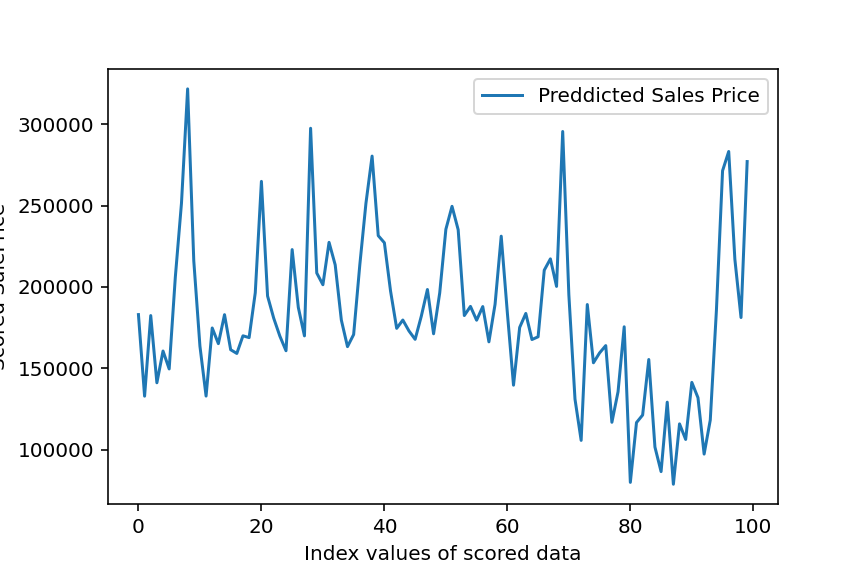

In [101]:
dfSalePrice_inverse = pd.DataFrame(yScaler.inverse_transform(scored_SalePrice), columns=['Preddicted Sales Price'], index=X_scoreReg_final.index)
line1 = dfSalePrice_inverse.plot()

In [102]:
line1.set_xlabel('Index values of scored data')
line1.set_ylabel('Scored SalePrice')

Text(0, 0.5, 'Scored SalePrice')

## Finally, save to external driver

In [103]:
dfSalePrice_inverse.insert(0,'PID', PID_column_score)
dfSalePrice_inverse

,PID,Preddicted Sales Price
0,528445060,182989.121695
1,528456160,132824.214953
2,528458070,182398.434782
3,906380190,141056.369617
4,906385010,160585.402407
...,...,...
95,528118040,271457.242135
96,528166120,283300.109808
97,528170070,217024.295408
98,528172080,181182.147816


In [104]:
dfSalePrice_inverse.to_csv("SalePrice_predict.csv", index=True)

# Bonuses:
### Top 5 properties with highest predictes score

In [105]:
top5 = dfSalePrice_inverse['Preddicted Sales Price'].nlargest(n=5)
print(top5)

8     321799.189013
28    297581.207522
69    295596.735657
96    283300.109808
38    280470.432115
Name: Preddicted Sales Price, dtype: float64


### Top 5 properties with highest predictes score

In [106]:
top20 = dfSalePrice_inverse['Preddicted Sales Price'].nlargest(n=20)
print(top20)

8     321799.189013
28    297581.207522
69    295596.735657
96    283300.109808
38    280470.432115
99    277103.427390
95    271457.242135
20    264920.569692
7     251514.020743
37    251434.210011
51    249573.484534
50    235463.133191
52    235184.983096
39    231547.269286
59    231219.876967
31    227421.331029
40    227162.483833
25    222970.138130
67    217253.719035
97    217024.295408
Name: Preddicted Sales Price, dtype: float64


# Summary of project

The summary of the project was to find which model best suites the score datase, whether the linear regression or the KNN Algorithm, it was proven that the regression mean was greater than the KNN mean so the Linear regression is the best suited model. 